## Assigment 2 - Aakash ME16B001
### Problem 4

Equation for Quadratic [5.66666666666667*a3 - 2.58333333333333]
{a3: 0.455882352941176}
Equation for Cubic [5.66666666666667*a3 + 27.8*a4 - 2.58333333333333, 9.8*a3 + 49.5*a4 - 3.9375]
{a3: 2.28442928039702, a4: -0.372725392886683}
Equation for Biquadratic [5.66666666666667*a3 + 27.8*a4 + 93.3333333333333*a5 - 2.58333333333333, 9.8*a3 + 49.5*a4 + 170.285714285714*a5 - 3.9375, 17.2*a3 + 88.8857142857143*a4 + 311.6*a5 - 6.21666666666667]
{a3: 6.08686497213195, a4: -2.05083141531741, a5: 0.268973698254388}


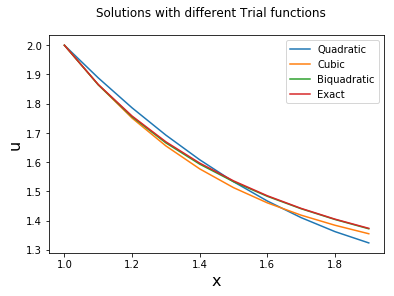

It can be observed from the graph that Biquadratic trial function 
has the least error and almost coincides with the exact soluton


In [4]:
from sympy import *
from sympy.solvers import solve
from sympy import Symbol
import matplotlib.pyplot as plt
import numpy as np

x=Symbol('x')
a1=Symbol('a1')
a2=Symbol('a2')
a3=Symbol('a3')
a4=Symbol('a4')
a5=Symbol('a5')
eqn_gal2 =[]
eqn_gal3 =[]
eqn_gal4 =[]


u2 = a1 + a2*x + a3*x*x
z2=u2.subs(a1,solve(u2.subs(x,1)-2 , a1)[0])
z2=z2.subs(a2,solve((x*diff(u2,x)+0.5).subs(x,2),a2)[0])
# finding residual
r_gal2=diff(x*(diff(z2,x)),x)-(2/(x*x))
eqn_gal2.append(integrate(r_gal2*x*x, (x, 1, 2)))
z_gal2 = solve(eqn_gal2, a3)
print("Equation for Quadratic",eqn_gal2)
print(z_gal2)

u3 = a1 + a2*x + a3*x*x + a4*x*x*x
z3=u3.subs(a1,solve(u3.subs(x,1)-2 , a1)[0])
z3=z3.subs(a2,solve((x*diff(u3,x)+0.5).subs(x,2),a2)[0])
# finding residual
r_gal3=diff(x*(diff(z3,x)),x)-(2/(x*x))
# galerkian integral wrt weighting functions
eqn_gal3.append(integrate(r_gal3*x*x, (x, 1, 2)))
eqn_gal3.append(integrate(r_gal3*x*x*x, (x, 1, 2)))
z_gal3 = solve(eqn_gal3, [a3,a4])
print("Equation for Cubic",eqn_gal3)
print(z_gal3)

u4 = a1 + a2*x + a3*x*x + a4*x*x*x + a5*x*x*x*x
z4=u4.subs(a1,solve(u4.subs(x,1)-2 , a1)[0])
z4=z4.subs(a2,solve((x*diff(u4,x)+0.5).subs(x,2),a2)[0])
# finding residual
r_gal4=diff(x*(diff(z4,x)),x)-(2/(x*x))
# galerkian integral wrt weighting functions
eqn_gal4.append(integrate(r_gal4*x*x, (x, 1, 2)))
eqn_gal4.append(integrate(r_gal4*x*x*x, (x, 1, 2)))
eqn_gal4.append(integrate(r_gal4*x*x*x*x, (x, 1, 2)))
z_gal4 = solve(eqn_gal4, [a3,a4,a5])
print("Equation for Biquadratic",eqn_gal4)
print(z_gal4)

# plotting the curve
u_gal2=[]
u_gal3=[]
u_gal4=[]
u_exact=[]
y = []
i=1
while i<=2:
    y.append(i)
    u_gal2.append((z2.subs(a3,z_gal2.get(a3))).subs(x,i))
    u_gal3.append(((z3.subs(a3,z_gal3.get(a3))).subs(a4,z_gal3.get(a4))).subs(x,i))
    u_gal4.append((((z4.subs(a3,z_gal4.get(a3))).subs(a4,z_gal4.get(a4))).subs(a5,z_gal4.get(a5))).subs(x,i))
    u_exact.append((2/i)+0.5*np.log(i))
    i+=0.1

plt.plot(y, u_gal2, label="Quadratic")
plt.plot(y, u_gal3, label="Cubic")
plt.plot(y, u_gal4, label="Biquadratic")
plt.plot(y, u_exact, label="Exact")
plt.legend()
plt.xlabel('x', fontsize=16)
plt.ylabel('u', fontsize=16)
plt.suptitle('Solutions with different Trial functions')
plt.show()

print("It can be observed from the graph that Biquadratic trial function \nhas the least error and almost coincides with the exact soluton")


### Problem 2

[x - 1, x**2 - 1, x**3 - 1]
x - 1
x**2 - 1
x**3 - 1
-3*a1*x**5/5 - a2*x**6 - 9*a3*x**7/7 + x**5/5 - x**4/4 + x**2*(x**3 - 1)*(-2*a1*(x - 1) - 2*a2*(x**2 - 1) - 2*a3*(x**3 - 1) + 1) - x**2/2 + x
[-31*a1/3 - 63*a2/2 - 373*a3/5 + 13/3, -63*a1/2 - 484*a2/5 - 231*a3 + 155/12, -373*a1/5 - 231*a2 - 3887*a3/7 + 599/20]
{a1: 26897/8951, a2: -72035/53706, a3: 7455/35804}


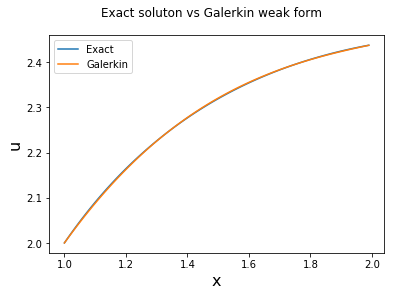

In [5]:
from sympy import *
from sympy.solvers import solve
from sympy import Symbol
import matplotlib.pyplot as plt
import numpy as np

x=Symbol('x')
a1=Symbol('a1')
a2=Symbol('a2')
a3=Symbol('a3')
wf1=Symbol('wf1')
wf2=Symbol('wf2')
eqn=[]

u=2+(x-1)*a1+(x*x-1)*a2+a3*(x**3-1)
up=diff(u,x)

n=[x-1,x*x-1,x**3-1]
print(n)
for i in range(3):
    print(n[i])
    w=n[i]*(x**2)*(5-2*u)-integrate(diff(n[i],x)*(x**2)*up,x)+integrate((x-1)*n[i],x)
    wf1=w.subs(x,1)
    wf2=w.subs(x,2)
    eqn.append(wf2-wf1)
print(w)
print(eqn)
sol=solve(eqn,[a1, a2, a3])
print(sol)

u_ext=[]
u_gal=[]
y = []
i=1
while i<=2:
    y.append(i)
    u_ext.append(((0.1)*(29.9096-(5*x)-(4.9096/x))+log(x)).subs(x,i))
    u_gal.append((((u.subs(a1,sol.get(a1))).subs(a2,sol.get(a2))).subs(a3,sol.get(a3))).subs(x,i))
    i+=0.01
plt.plot(y, u_ext, label="Exact")
plt.plot(y, u_gal, label="Galerkin")
plt.legend()
plt.xlabel('x', fontsize=16)
plt.ylabel('u', fontsize=16)
plt.suptitle('Exact soluton vs Galerkin weak form')
plt.show()